In [1]:
%load_ext watermark
%watermark -u -d -v -p numpy,matplotlib,scipy,pandas,sklearn,mlxtend

last updated: 2017-04-20 

CPython 2.7.10
IPython 5.3.0

numpy 1.12.1
matplotlib 2.0.0
scipy 0.19.0
pandas 0.19.2
sklearn 0.18.1
mlxtend 0.5.1


In [8]:
%matplotlib inline
from __future__ import division, print_function
import numpy as np
from scipy import optimize
import pandas as pd
import matplotlib.pyplot as plt
import seaborn.apionly as sns

import composition as comp
import composition.analysis.plotting as plotting

In [3]:
comp_class = True
comp_list = ['light', 'heavy'] if comp_class else ['P', 'He', 'O', 'Fe']

In [4]:
df_sim = comp.load_dataframe(datatype='sim')

sim quality cut event flow:
             IceTopQualityCuts:    1.0    1.0
         lap_InIce_containment:  0.776  0.776
              InIceQualityCuts:  0.786   0.75
                 num_hits_1_60:  0.999   0.75
             reco_energy_range:  0.837  0.623
                 IceTop_charge:  0.896  0.562




/home/jbourbeau/cr-composition/composition/dataframe_functions.py:145: RuntimeWarning: divide by zero encountered in log10
  df['log_IceTop_charge_175m'] = np.log10(df['IceTop_charge_175m'])


In [10]:
df_sim['lap_beta']

0         3.519844
1         3.323477
3         3.458115
4         3.194459
5         3.250745
6         3.059247
7         3.325705
8         3.149160
13        3.342805
14        3.189697
17        3.392250
18        3.340039
19        3.437743
21        3.324724
22        3.273614
27        3.532846
35        2.990313
36        3.067966
38        3.167077
39        3.267866
40        3.147007
41        3.367651
42        3.194450
44        3.126853
45        2.952732
46        3.050624
47        3.188828
49        2.912476
50        3.412437
51        3.263967
            ...   
397987    3.031989
397989    2.677845
398000    3.232594
398001    3.279692
398002    2.874440
398003    2.821055
398004    2.943548
398005    3.119237
398007    3.079967
398008    2.778261
398010    3.459358
398011    3.546341
398012    2.813934
398014    2.992454
398015    3.221567
398016    2.872395
398017    3.156017
398020    2.910178
398021    2.887417
398022    2.960273
398023    2.892069
398024    2.

In [42]:
def fit_beta(charges, distances, log_s125, lap_beta):

    charges = np.asarray(charges)
    distances = np.asarray(distances)
    print('charges = {}'.format(charges))
    print('distances = {}'.format(distances))
    print('log_s125 = {}'.format(log_s125))
    print('lap_beta = {}'.format(lap_beta))

    def LDF(dists, beta):
        return 10**log_s125 * (dists/125)**(-beta-0.303*np.log10(dists/125))
#         return log_s125 - beta*np.log10(dists/125) - 0.303*np.log10(np.log10(dists/125))

    popt, pcov = optimize.curve_fit(LDF, distances, np.log10(charges))
#     popt, pcov = optimize.curve_fit(LDF, distances, np.log10(charges), p0=lap_beta-1)
    print(popt)

In [43]:
df_sim['tank_dists'][3]

array([ 563.19205409,  728.49952746,  597.57259199,  502.87094917,
        360.81235537,  341.88334214,  486.27225865,  488.75861346,
        345.31191548,  272.50841185,  278.50628564,  381.40689465,
        397.40017885,  217.60213822,  134.96804375,  126.1607868 ,
        184.98520993,  175.21405068,  306.44667554,  200.66732924,
        210.26010017,   99.47640616,  104.17753637,   68.28022341,
         58.88122516,  195.86382601,  189.26460486,  397.49789313,
        251.46569843,  259.43667521,  137.74640939,  146.61478985,
         74.31949249,   82.34447256,  135.79599198,  127.29198893,
        249.79335454,  240.31324681,  244.0123336 ,  250.63420275,
        172.22679976,  168.84823934,  166.75610549,  174.90084695,
        238.9441929 ,  359.87787381])

In [44]:
np.log10(df_sim['tank_dists'][3]/125)

array([ 0.65374651,  0.76551926,  0.67948066,  0.60454653,  0.46037139,
        0.43696793,  0.58996948,  0.59218441,  0.44130155,  0.3384699 ,
        0.34792499,  0.48447853,  0.50231805,  0.24075315,  0.03332094,
        0.00401438,  0.17022699,  0.14665892,  0.3894449 ,  0.20556666,
        0.22584685, -0.09918993, -0.07913593, -0.26261508, -0.32693318,
        0.19504422,  0.18015939,  0.50242482,  0.30356874,  0.31712136,
        0.04217027,  0.06926777, -0.22580728, -0.18127556,  0.03597694,
        0.00789106,  0.30067087,  0.2838677 ,  0.29050177,  0.30213032,
        0.13919072,  0.13058652,  0.12517173,  0.1458819 ,  0.28138647,
        0.45924513])

In [45]:
fit_beta(df_sim['tank_charges'][3], df_sim['tank_dists'][3], df_sim['log_s125'][3], df_sim['lap_beta'][3])

charges = [  1.1489253    0.14102778   0.74507076   0.25572646   0.18200278
   0.45130467   0.54038841   0.26852089   0.22046663   1.03550625
   1.51601493   0.31989381   0.15767671   1.04164982   2.05677414
   7.54050732   1.68407524   1.83120334   0.81869787   0.21163651
   1.94171214   6.6918025   14.103755    53.04872513  81.28752899
   2.57384896   1.91906309   0.13023351   1.65206754   2.56118107
   1.74762833   2.67273593  21.19219398  21.02318764   4.47604799
   5.14276934   1.68159831   0.95564413   4.39349222   0.69666201
   2.64331651   3.85827303   1.49899232   2.27820587   1.17120278
   0.227301  ]
distances = [ 563.19205409  728.49952746  597.57259199  502.87094917  360.81235537
  341.88334214  486.27225865  488.75861346  345.31191548  272.50841185
  278.50628564  381.40689465  397.40017885  217.60213822  134.96804375
  126.1607868   184.98520993  175.21405068  306.44667554  200.66732924
  210.26010017   99.47640616  104.17753637   68.28022341   58.88122516
  195.86382601

In [11]:
dist_bins = np.logspace(-2, 4, 50)
charge_bins = np.logspace(-2, 1, 50)
def make_charge_dist_hist(charges, dists):
    # Create charge vs distance histogram
    hist, _ , _ = np.histogram2d(dists, charges, bins=(dist_bins, charge_bins))
    return hist

In [ ]:
y, x = np.meshgrid(charge_bins, dist_bins)

In [ ]:
np.logspace(-2, 1, 50)

In [8]:
hist = make_charge_dist_hist(df_sim['tank_charges'].values[0], df_sim['tank_dists'][0])

14.0
23.0
14.0
17.0


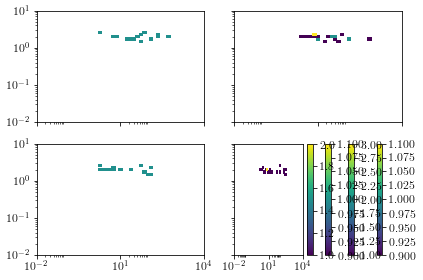

In [32]:
n_side = 2
fig, axarr = plt.subplots(n_side, n_side, sharex=True, sharey=True)
for i, ax in zip(range(n_side**2), axarr.flat):
#     plotting.histogram_2D(df_sim['tank_dists'].values[i], df_sim['tank_charges'].values[i],
#                           bins=(np.logspace(-2, 4, 50), np.logspace(0, 3, 50)), ax=ax,
#                           log_counts=False, logx=False, logy=False, colorbar=False)
    hist = make_charge_dist_hist(df_sim['tank_charges'].values[i], df_sim['tank_dists'].values[i])
    print(hist.sum())
    hist = np.ma.masked_where(hist == 0, hist)
    im = ax.pcolormesh(dist_bins, charge_bins, hist)
    cb = plt.colorbar(im)
#     ax = sns.heatmap(hist, ax=ax, xticklabels=dist_bins[:-1].astype(str))
#     ax.imshow(hist)
#     ax.scatter(np.log10(df_sim['tank_dists'].values[i]),
#                np.log10(df_sim['tank_charges'].values[i]))
ax.set_yscale("log", nonposy='clip')
ax.set_xscale("log")
# plt.tight_layout()
plt.show()

/home/jbourbeau/.local/lib/python2.7/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


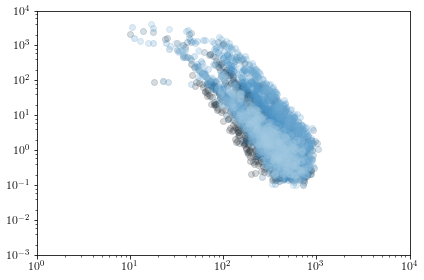

In [6]:
num_samples = 50
with sns.color_palette("Blues_d", num_samples):
    fig, ax = plt.subplots()
    for i in range(num_samples):
        ax.scatter(df_sim['tank_dists'].values[i],
                   df_sim['tank_charges'].values[i], alpha=0.2)
    ax.set_xlim([1e0, 1e4])        
    ax.set_ylim([1e-3, 1e4])        
    ax.set_yscale("log", nonposy='clip')
    ax.set_xscale("log")
    # plt.tight_layout()
    plt.show()

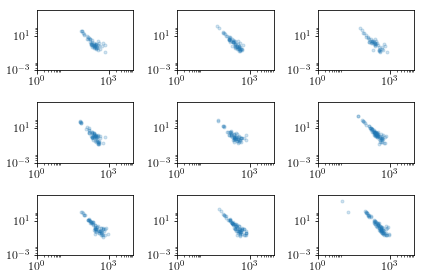

In [7]:
n_side = 3
# with sns.color_palette("Blues_d", num_samples):
fig, axarr = plt.subplots(n_side, n_side)
for i, ax in zip(range(n_side**2), axarr.flatten()):
    ax.scatter(df_sim['tank_dists'].values[i],
               df_sim['tank_charges'].values[i], alpha=0.2, marker='.')        
    ax.set_yscale("log", nonposy='clip')
    ax.set_xscale("log")
    ax.set_xlim([1e0, 1e4])        
    ax.set_ylim([1e-3, 1e4])
#     ax.grid(which='both')
plt.tight_layout()
plt.savefig('/home/jbourbeau/public_html/figures/charge-vs-dist-example.png')
plt.show()

In [14]:
df_sim['IceTop_charge_175m']

0        20.058378
1        29.236588
3        24.653706
4        43.553578
5        26.962508
6       116.140023
7        69.885908
8        94.203468
9       114.925585
13      144.763668
14      593.937967
15             NaN
16      493.189828
17      296.621447
18      560.180260
19      512.185095
20      515.754776
21      814.693836
22      666.467974
24             NaN
25     3144.262996
27     2094.893203
28             NaN
29        2.371916
31        2.053227
32        1.679182
33        2.909671
34        3.304956
35        2.357022
36        2.519217
          ...     
552      35.772240
553      39.260871
554      15.444319
555      39.700688
556      20.924497
557      49.848645
558      39.834411
559      49.287796
560      18.366836
561      35.622564
562      45.618567
563      53.811592
564      32.396299
566      17.402792
567      47.127543
569      50.945199
571      47.886598
573      46.608904
574      68.289053
575      41.533198
576      57.789352
577      15.